In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

n,m=A.shape
k=2

np.random.seed(10)
P=np.random.randn(n,k)
Q=np.random.randn(m,k)

b=np.mean(A[np.where(A!=0)])
bi=np.zeros(n)
bj=np.zeros(m)
iterr=20
alpha=0.01
beta=0.02

In [4]:
train=[(i,j,A[i,j]) for i in range(n) for j in range(m) if A[i,j]!=0]

In [5]:
df=pd.DataFrame(train,columns=['user','item','rating'])
df

,user,item,rating
0,0,0,5
1,0,1,3
2,0,3,1
3,1,0,4
4,1,3,1
5,2,0,1
6,2,1,1
7,2,3,5
8,3,0,1
9,3,3,4


In [6]:
def  backprop(x, P=P, Q=Q, b=b, bi=bi, bj=bj,alpha=alpha, beta=beta):
    i=x[0]
    j=x[1]
    a=x[2]
    a_hat=b + np.dot( P[i,:]+bi[i] ,(Q[j,:]+bj[j]).T)
    e=(a_hat-a)
    
    dp=e*(Q[j,:]+bj[j])
    P[i,:]=P[i,:]-alpha*dp
    
    dq=e*(P[i,:]+bi[i])
    Q[j,:]=Q[j,:]-alpha*dq
    
    db=e
    b=b-beta*e
    
    dbi=dp
    bi[i]=bi[i]-beta*np.mean(dbi)
    
    dbj=dq
    bj[j]=bj[j]-beta*np.mean(dbj)
    
    a_hat=b + np.dot( P[i,:]+bi[i] ,(Q[j,:]+bj[j]).T)
    err=(a-a_hat)**2
    
    return P,Q,b,bi,bj,err

In [7]:
def model(df, iterr=20, P=P, Q=Q, b=b, bi=bi, bj=bj,alpha=alpha, beta=beta):
    total_scores=[]
    for _ in range(iterr):
        batch_scores=[]
        for x in df.index:
            P,Q,b,bi,bj,err=backprop(df[['user','item','rating']].loc[x,:])
            batch_scores.append(err)
        total_scores.append(np.mean(batch_scores))
    
    plt.plot(total_scores)
    result={'P':P, 'Q':Q, 'b':b, 'bi':bi, 'bj':bj}
    return total_scores, result


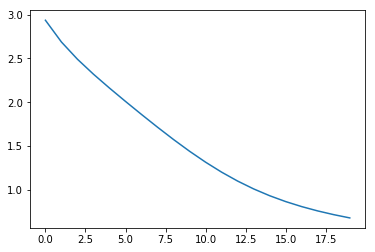

In [8]:
scores, result=model(df)

In [9]:
scores[-1]

0.6795564592705221